# YouTube Trailer Views
Find view counts of movie trailers

In [2]:
%matplotlib inline

import configparser
import os

import requests
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse, stats, spatial
import scipy.sparse.linalg
from sklearn import preprocessing, decomposition
import librosa
import IPython.display as ipd
import json

import requests
import csv
from pygsp import graphs, filters, plotting

plotting.BACKEND = 'matplotlib'

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6);

2018-01-22 23:10:18,483:[WARNING](pygsp.graphs.nngraphs.nngraph.<module>): Cannot import pyflann (used for faster kNN computations): Traceback (most recent call last):
  File "C:\Users\Valentin\Anaconda3\lib\site-packages\pygsp\graphs\nngraphs\nngraph.py", line 14, in <module>
    import pyflann as pfl
  File "C:\Users\Valentin\Anaconda3\lib\site-packages\pyflann\__init__.py", line 27, in <module>
    from pyflann.index import *
  File "C:\Users\Valentin\Anaconda3\lib\site-packages\pyflann\index.py", line 27, in <module>
    from pyflann.bindings.flann_ctypes import *
  File "C:\Users\Valentin\Anaconda3\lib\site-packages\pyflann\bindings\__init__.py", line 30, in <module>
    from pyflann.bindings.flann_ctypes import *
  File "C:\Users\Valentin\Anaconda3\lib\site-packages\pyflann\bindings\flann_ctypes.py", line 171, in <module>
    raise ImportError('Cannot load dynamic library. Did you compile FLANN?')
ImportError: Cannot load dynamic library. Did you compile FLANN?



Populating the interactive namespace from numpy and matplotlib


C:\Users\Valentin\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plotting']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [18]:
# Read the confidential credentials file
credentials = configparser.ConfigParser()
credentials.read('Credentials_Valentin.ini')

# get YouTube API key
api_key = credentials.get('YouTube', 'key2')

### Import Dataset

In [3]:
df = pd.read_csv('Saved_Datasets/NewFeaturesDataset.csv')

### Remove useless Columns

In [321]:
df.drop(['budget','genres','overview','production_companies','release_date','revenue','success',
         'ROI','director_name','actor_names','Metacritic'], axis=1, inplace = True)

### YouTube API Test

For Youtueb API, see: 
https://developers.google.com/youtube/v3/docs/

For channel id, see:
https://developers.google.com/youtube/v3/docs/channels/list

Channel 1 : Movieclips Trailers channel id: **UCi8e0iOVk1fEOogdfu4YgfA**

Channel 2 : Movieclips Trailer Vault channel id: **UCTCjFFoX1un-j7ni4B6HJ3Q**

Channel 3 : TrailersPlaygroundHD channel id: **UCeR7qki1ikig6q4HwvP6dTg**

Channel 4 : TheCultBox channel id: ** UCn9PskIfVA5RH6bC9hbtzWg **

Channel 5 : Forever Cinematic Trailers channel id: ** UCGLSYrwuo44K0U6PQmYtN3Q **

Channel 6 : FRESH Movie Trailers channel id: ** UCzNWVDZQ55bjq8uILZ7_wyQ **

Channel 7 : JoBlo Movie Trailers channel id: ** UCRX7UEyE8kp35mPrgC2sosA **

Channel 8 : FilmIsNow Movie Trailers channel id: ** UCOP-gP2WgKUKfFBMnkR3iaA **

In [ ]:
movie_name = "Kill Bill: Vol. 1"

channel_id = 'UCTCjFFoX1un-j7ni4B6HJ3Q'

website = "https://www.googleapis.com/youtube/v3/search?"

request = website+"key="+api_key+"&channelId="+channel_id+"&part=snippet&maxResults=10&q=Trailer "+movie_name

response = requests.get(request).json()

response_list = list((item['snippet']['title'] for item in response['items']))

print(response_list)

In [35]:
def get_views(movie_name,channel_id):
        
    #get video id (only takes the first 10 results)
    website = "https://www.googleapis.com/youtube/v3/search?"
    request = website+"key="+api_key+"&channelId="+channel_id+"&part=snippet,id&maxResults=10&q=Trailer "+movie_name
    response = requests.get(request).json()
    #if we have no error...
    try:
        #verify if the movie name is in the title of the video
        video_id = 'none'
        for test in response['items']:
            if movie_name in test['snippet']['title']:
                video = test['snippet']['title']
                video_id = test['id']['videoId']
                break                
    #if we have an error (or no result)
    except:
        print("Err Except: '"+movie_name+"'")
        return 'Error'
    
    if (video_id == 'none'):
        print("Err No Res: '"+movie_name+"'")
        return 'Error'
    
    #get video view count
    website = "https://www.googleapis.com/youtube/v3/videos?"
    request = website+"key="+api_key+"&part=statistics&maxResults=1&id="+video_id
    response = requests.get(request).json()
    try:
        view_count = int(response['items'][0]['statistics']['viewCount'])
        return list([video, view_count])
    except:
        print("Err Except: '"+movie_name+"'")
        return 'Error'

In [ ]:
#get_views(df.iloc[46]['title'],'UCi8e0iOVk1fEOogdfu4YgfA')

In [5]:
df['TrailerViews1'] = df.apply (lambda row: get_views(row['title'],'UCi8e0iOVk1fEOogdfu4YgfA'),axis=1)

Err No Res: 'Dancer in the Dark'
Err No Res: 'Pirates of the Caribbean: The Curse of the Black Pearl'
Err No Res: 'Kill Bill: Vol. 1'
Err No Res: 'Jarhead'
Err No Res: '9 Songs'
Err No Res: 'The Simpsons Movie'
Err No Res: 'Eternal Sunshine of the Spotless Mind'
Err No Res: 'Pirates of the Caribbean: Dead Man's Chest'
Err No Res: 'A History of Violence'
Err No Res: 'Walk the Line'
Err No Res: 'Million Dollar Baby'
Err No Res: 'Billy Elliot'
Err No Res: 'Memento'
Err No Res: 'Before Sunset'
Err No Res: 'Miami Vice'
Err No Res: 'Open Water'
Err No Res: 'Match Point'
Err No Res: 'Charlie and the Chocolate Factory'
Err No Res: 'The Lord of the Rings: The Fellowship of the Ring'
Err No Res: 'The Lord of the Rings: The Two Towers'
Err No Res: 'The Lord of the Rings: The Return of the King'
Err No Res: 'O Brother, Where Art Thou?'
Err No Res: 'Brokeback Mountain'
Err No Res: 'Lost in Translation'
Err No Res: 'Ocean's Eleven'
Err No Res: 'Ocean's Twelve'
Err No Res: 'K-PAX'
Err No Res: '28 Day

Err No Res: 'Femme Fatale'
Err No Res: 'Final Destination 3'
Err No Res: 'Crocodile Dundee in Los Angeles'
Err No Res: 'The Longest Yard'
Err No Res: 'John Tucker Must Die'
Err No Res: 'Monster House'
Err No Res: 'American Dreamz'
Err No Res: 'Flightplan'
Err No Res: 'Transporter 2'
Err No Res: 'Click'
Err No Res: 'The Core'
Err No Res: 'EuroTrip'
Err No Res: 'Nacho Libre'
Err No Res: 'One Hour Photo'
Err No Res: 'Final Destination 2'
Err No Res: 'Super Size Me'
Err No Res: 'Babylon A.D.'
Err No Res: 'Hollow Man'
Err No Res: 'Starsky & Hutch'
Err No Res: 'Thank You for Smoking'
Err No Res: 'Evolution'
Err No Res: 'Surf's Up'
Err No Res: 'The Royal Tenenbaums'
Err No Res: 'Charlie's Angels: Full Throttle'
Err No Res: 'DodgeBall: A True Underdog Story'
Err No Res: 'A Knight's Tale'
Err No Res: 'Daredevil'
Err No Res: 'Spy Kids 2: The Island of Lost Dreams'
Err No Res: 'Anger Management'
Err No Res: 'Man on Fire'
Err No Res: 'The Matador'
Err No Res: 'Wedding Crashers'
Err No Res: 'RV'
Er

Err No Res: 'Gods and Generals'
Err No Res: 'First Snow'
Err No Res: 'Baby Boy'
Err No Res: 'Whatever It Takes'
Err No Res: 'Mr. 3000'
Err No Res: 'Serenity'
Err No Res: 'Ong Bak 2'
Err No Res: 'Where the Wild Things Are'
Err No Res: 'I Love You, Man'
Err No Res: 'Daddy's Little Girls'
Err No Res: 'Duplicity'
Err No Res: 'Astro Boy'
Err No Res: 'The Proposition'
Err No Res: 'Adventureland'
Err No Res: 'Mindhunters'
Err No Res: 'In My Country'
Err No Res: 'Life or Something Like It'
Err No Res: 'The Other Side of Heaven'
Err No Res: 'Return to Never Land'
Err No Res: 'Sugar & Spice'
Err No Res: 'The Tracey Fragments'
Err No Res: 'The Namesake'
Err No Res: 'Madea's Family Reunion'
Err No Res: 'Welcome to Mooseport'
Err No Res: 'Planet 51'
Err No Res: 'Inglourious Basterds'
Err No Res: 'Battle for Terra'
Err No Res: 'The Ladies Man'
Err No Res: 'Intermission'
Err No Res: 'State of Play'
Err No Res: '17 Again'
Err No Res: 'Agent Cody Banks 2: Destination London'
Err No Res: 'The Ballad of 

Err No Res: 'War Room'
Err No Res: 'Risen'
Err No Res: 'White Girl'
Err No Res: '90 Minutes in Heaven'
Err No Res: 'Momentum'
Err No Res: 'Mi America'
Err No Res: 'I'm Not Ashamed'


In [6]:
df['TrailerViews2'] = df.apply (lambda row: get_views(row['title'],'UCTCjFFoX1un-j7ni4B6HJ3Q'),axis=1)

Err No Res: 'Dancer in the Dark'
Err No Res: '9 Songs'
Err No Res: 'The Simpsons Movie'
Err No Res: 'Pirates of the Caribbean: Dead Man's Chest'
Err No Res: 'Walk the Line'
Err No Res: 'Billy Elliot'
Err No Res: 'War of the Worlds'
Err No Res: 'Memento'
Err No Res: 'Match Point'
Err No Res: 'The Lord of the Rings: The Fellowship of the Ring'
Err No Res: 'Donnie Darko'
Err No Res: 'Brokeback Mountain'
Err No Res: 'Ocean's Eleven'
Err No Res: 'Ocean's Twelve'
Err No Res: '28 Days Later'
Err No Res: 'The Good German'
Err No Res: 'Sin City: A Dame to Kill For'
Err No Res: 'Star Trek: Nemesis'
Err No Res: 'Indiana Jones and the Kingdom of the Crystal Skull'
Err No Res: 'Young Adam'
Err No Res: 'High Fidelity'
Err No Res: 'About a Boy'
Err No Res: 'Oliver Twist'
Err No Res: 'Dave Chappelle's Block Party'
Err No Res: 'Terminator 3: Rise of the Machines'
Err No Res: 'Ocean's Thirteen'
Err No Res: 'Swimming Pool'
Err No Res: 'Bruce Almighty'
Err No Res: 'Snow Cake'
Err No Res: 'Insomnia'
Err No

Err No Res: 'Queen of the Damned'
Err No Res: 'Just Married'
Err No Res: 'Don't Say a Word'
Err No Res: 'Nutty Professor II: The Klumps'
Err No Res: 'Step Brothers'
Err No Res: '3000 Miles to Graceland'
Err No Res: 'Alone in the Dark'
Err No Res: 'Frailty'
Err No Res: 'The Wrestler'
Err No Res: 'The Love Guru'
Err No Res: 'Star Wars: The Clone Wars'
Err No Res: 'Nick and Norah's Infinite Playlist'
Err No Res: 'Edge of Darkness'
Err No Res: 'Highlander: Endgame'
Err No Res: 'Urban Legends: Final Cut'
Err No Res: 'Horton Hears a Who!'
Err No Res: 'Biker Boyz'
Err No Res: 'Spy Kids 3-D: Game Over'
Err No Res: 'Mean Creek'
Err No Res: 'Me and Orson Welles'
Err No Res: 'Slumdog Millionaire'
Err No Res: 'Miracle at St. Anna'
Err No Res: 'The Nanny Diaries'
Err No Res: 'Harry Potter and the Deathly Hallows: Part 2'
Err No Res: 'Brideshead Revisited'
Err No Res: 'A Serious Man'
Err No Res: 'Jimmy Neutron: Boy Genius'
Err No Res: 'The House Bunny'
Err No Res: 'The Big Bounce'
Err No Res: 'Inhal

Err No Res: 'Snow White and the Huntsman'
Err No Res: 'Bellflower'
Err No Res: 'Snow Flower and the Secret Fan'
Err No Res: 'Tower Heist'
Err No Res: 'Midnight in Paris'
Err No Res: 'Attack the Block'
Err No Res: 'The 5th Quarter'
Err No Res: 'Kick-Ass 2'
Err No Res: 'Monte Carlo'
Err No Res: 'Safe House'
Err No Res: 'This Means War'
Err No Res: 'Dark Tide'
Err No Res: 'Abduction'
Err No Res: 'Looper'
Err No Res: 'Our Idiot Brother'
Err No Res: 'Legends of Oz: Dorothy's Return'
Err No Res: 'Judy Moody and the Not Bummer Summer'
Err No Res: 'Hansel & Gretel: Witch Hunters'
Err No Res: 'Diary of a Wimpy Kid: Rodrick Rules'
Err No Res: 'Moneyball'
Err No Res: 'The Conspirator'
Err No Res: 'Like Crazy'
Err No Res: 'Another Happy Day'
Err No Res: 'Arbitrage'
Err No Res: 'Silent Hill: Revelation 3D'
Err No Res: 'Rise of the Planet of the Apes'
Err No Res: 'Anonymous'
Err No Res: 'Flypaper'
Err No Res: '30 Minutes or Less'
Err No Res: 'Monsters University'
Err No Res: 'Frankenweenie'
Err No R

Err No Res: 'Paul Blart: Mall Cop 2'
Err No Res: 'Little Boy'
Err No Res: 'Point Break'
Err No Res: 'Get Hard'
Err No Res: 'The Intern'
Err No Res: 'Pixels'
Err No Res: 'The Darkness'
Err No Res: 'Goosebumps'
Err No Res: 'Last Flight'
Err Except: 'A Monster Calls'
Err No Res: 'The Legend of Tarzan'
Err No Res: 'Fantastic Beasts and Where to Find Them'
Err No Res: 'The Conjuring 2'
Err No Res: 'How to Be Single'
Err No Res: 'Live by Night'
Err No Res: 'Taken 3'
Err No Res: 'Black Mass'
Err No Res: 'American Ultra'
Err No Res: 'Insurgent'
Err No Res: 'Allegiant'
Err No Res: 'Knock Knock'
Err No Res: 'The Homesman'
Err No Res: 'Ex Machina'
Err No Res: 'Magic Mike XXL'
Err No Res: 'Mommy'
Err No Res: 'Sisters'
Err No Res: 'The Gunman'
Err No Res: 'Jem and the Holograms'
Err No Res: 'Pan'
Err No Res: 'The Theory of Everything'
Err No Res: 'Grimsby'
Err No Res: 'The BFG'
Err No Res: 'The Second Best Exotic Marigold Hotel'
Err No Res: 'Hot Pursuit'
Err No Res: 'Zootopia'
Err No Res: 'It Follo

In [7]:
df['TrailerViews3'] = df.apply (lambda row: get_views(row['title'],'UCeR7qki1ikig6q4HwvP6dTg'),axis=1)

Err No Res: 'Dancer in the Dark'
Err No Res: 'Pirates of the Caribbean: The Curse of the Black Pearl'
Err No Res: 'Kill Bill: Vol. 1'
Err No Res: 'Jarhead'
Err No Res: '9 Songs'
Err No Res: 'The Simpsons Movie'
Err No Res: 'Eternal Sunshine of the Spotless Mind'
Err No Res: 'Pirates of the Caribbean: Dead Man's Chest'
Err No Res: 'A History of Violence'
Err No Res: '8 Mile'
Err No Res: 'Walk the Line'
Err No Res: 'Billy Elliot'
Err No Res: 'War of the Worlds'
Err No Res: 'Memento'
Err No Res: 'Before Sunset'
Err No Res: 'Open Water'
Err No Res: 'Snatch'
Err No Res: 'Match Point'
Err No Res: 'Charlie and the Chocolate Factory'
Err No Res: 'The Lord of the Rings: The Fellowship of the Ring'
Err No Res: 'The Lord of the Rings: The Two Towers'
Err No Res: 'The Lord of the Rings: The Return of the King'
Err No Res: 'O Brother, Where Art Thou?'
Err No Res: 'Donnie Darko'
Err No Res: 'Brokeback Mountain'
Err No Res: 'K-PAX'
Err No Res: 'The Good German'
Err No Res: 'Lucky Number Slevin'
Err N

Err No Res: 'Barnyard'
Err No Res: 'Two for the Money'
Err No Res: 'The Skeleton Key'
Err No Res: 'How to Lose a Guy in 10 Days'
Err No Res: 'Domino'
Err No Res: 'Robots'
Err No Res: 'Analyze That'
Err No Res: 'Elektra'
Err No Res: 'Rescue Dawn'
Err No Res: 'The Covenant'
Err No Res: 'Trailer Park Boys: The Movie'
Err No Res: 'Freedomland'
Err No Res: 'The Good Girl'
Err No Res: 'The Messengers'
Err No Res: 'Curious George'
Err No Res: 'Stormbreaker'
Err No Res: 'Kicking & Screaming'
Err No Res: 'Chicken Little'
Err No Res: 'Charlotte's Web'
Err No Res: 'Beerfest'
Err No Res: 'AntiTrust'
Err No Res: 'Arthur and the Invisibles'
Err No Res: 'Cursed'
Err No Res: 'Ghosts of Mars'
Err No Res: 'The Pacifier'
Err No Res: 'My Sister's Keeper'
Err No Res: 'Just My Luck'
Err No Res: 'Unleashed'
Err No Res: 'Honey'
Err No Res: 'Stealth'
Err No Res: 'Dragonfly'
Err No Res: 'When a Stranger Calls'
Err No Res: 'Spy Kids'
Err No Res: 'Get Rich or Die Tryin''
Err No Res: 'The Amityville Horror'
Err No

Err No Res: 'The Spy Next Door'
Err No Res: 'Bandslam'
Err No Res: 'Alvin and the Chipmunks: The Squeakquel'
Err No Res: 'A Nightmare on Elm Street'
Err No Res: 'Videocracy'
Err No Res: 'The Rum Diary'
Err No Res: 'We Don't Live Here Anymore'
Err No Res: 'Monkeybone'
Err No Res: 'All About Steve'
Err No Res: 'Cop Out'
Err No Res: 'Pontypool'
Err No Res: 'The Little Vampire'
Err No Res: 'Town & Country'
Err No Res: 'Halloween II'
Err No Res: 'Cirque du Freak: The Vampire's Assistant'
Err No Res: 'Did You Hear About the Morgans?'
Err No Res: 'Fish Tank'
Err No Res: 'An Education'
Err No Res: 'Julie & Julia'
Err No Res: 'Black Dynamite'
Err No Res: 'Night Of The Living Dead 3D'
Err No Res: 'Head Over Heels'
Err No Res: 'Ghosts of the Abyss'
Err No Res: 'Shorts'
Err No Res: 'Beyond a Reasonable Doubt'
Err No Res: 'Full Grown Men'
Err No Res: 'Drowning Mona'
Err No Res: 'Janky Promoters'
Err No Res: 'Leap Year'
Err No Res: 'Crazy Heart'
Err No Res: 'The House of Mirth'
Err No Res: 'Love Hap

Err No Res: 'Secret in Their Eyes'
Err No Res: 'Tracers'
Err No Res: 'Anomalisa'
Err No Res: 'Rules Don't Apply'
Err No Res: 'Billy Lynn's Long Halftime Walk'
Err No Res: 'The Age of Adaline'
Err No Res: 'Everybody Wants Some!!'
Err No Res: 'Bridge of Spies'
Err No Res: 'Love & Friendship'
Err No Res: 'I Saw the Light'
Err No Res: 'The Dressmaker'
Err No Res: 'The Gallows'
Err No Res: '13 Hours: The Secret Soldiers of Benghazi'
Err No Res: 'The Neon Demon'
Err No Res: 'The Opposite Sex'
Err No Res: 'My Big Fat Greek Wedding 2'
Err No Res: 'Woman in Gold'
Err No Res: 'The Perfect Guy'
Err No Res: 'Tangerine'
Err No Res: 'The Bronze'
Err No Res: 'Teenage Mutant Ninja Turtles: Out of the Shadows'
Err No Res: 'The D Train'
Err No Res: 'Dope'
Err No Res: 'Grandma'
Err No Res: 'The Founder'
Err No Res: 'Kubo and the Two Strings'
Err No Res: 'Green Room'
Err No Res: 'By the Sea'
Err No Res: 'Florence Foster Jenkins'
Err No Res: 'Mike and Dave Need Wedding Dates'
Err No Res: 'Colonia'
Err No R

In [7]:
df['TrailerViews4'] = df.apply (lambda row: get_views(row['title'],'UCn9PskIfVA5RH6bC9hbtzWg'),axis=1)

Err No Res: 'Finding Nemo'
Err No Res: 'Pirates of the Caribbean: The Curse of the Black Pearl'
Err No Res: 'Kill Bill: Vol. 1'
Err No Res: 'Jarhead'
Err No Res: 'The Simpsons Movie'
Err No Res: 'Eternal Sunshine of the Spotless Mind'
Err No Res: 'Pirates of the Caribbean: Dead Man's Chest'
Err No Res: 'A History of Violence'
Err No Res: '8 Mile'
Err No Res: 'Walk the Line'
Err No Res: 'Million Dollar Baby'
Err No Res: 'Billy Elliot'
Err No Res: 'War of the Worlds'
Err No Res: 'Memento'
Err No Res: 'Before Sunset'
Err No Res: 'Open Water'
Err No Res: 'Gladiator'
Err No Res: 'Snatch'
Err No Res: 'Match Point'
Err No Res: 'Charlie and the Chocolate Factory'
Err No Res: 'The Lord of the Rings: The Fellowship of the Ring'
Err No Res: 'The Lord of the Rings: The Two Towers'
Err No Res: 'The Lord of the Rings: The Return of the King'
Err No Res: 'O Brother, Where Art Thou?'
Err No Res: 'Donnie Darko'
Err No Res: 'The Dark Knight'
Err No Res: 'Ocean's Eleven'
Err No Res: 'Ocean's Twelve'
Err 

Err No Res: 'The 6th Day'
Err No Res: 'Never Back Down'
Err No Res: 'John Q'
Err No Res: 'Hitch'
Err No Res: 'Ali'
Err No Res: 'Shanghai Noon'
Err No Res: 'The History Boys'
Err No Res: 'Master and Commander: The Far Side of the World'
Err No Res: 'The Exorcism of Emily Rose'
Err No Res: 'The Happening'
Err No Res: 'K-19: The Widowmaker'
Err No Res: 'Fool's Gold'
Err No Res: 'Taken'
Err No Res: 'Calendar Girls'
Err No Res: 'The League of Extraordinary Gentlemen'
Err No Res: 'Anchorman: The Legend of Ron Burgundy'
Err No Res: 'Baby Mama'
Err No Res: 'Doom'
Err No Res: 'Legally Blonde'
Err No Res: 'The X Files: I Want to Believe'
Err No Res: 'Against the Ropes'
Err No Res: 'The Cell'
Err No Res: 'The Bank Job'
Err No Res: 'Alfie'
Err No Res: 'Red Planet'
Err No Res: 'How the Grinch Stole Christmas'
Err No Res: 'Waltz with Bashir'
Err No Res: 'Wanted'
Err No Res: 'Amelia'
Err No Res: 'Garfield'
Err No Res: 'Jeepers Creepers'
Err No Res: 'I Love You Phillip Morris'
Err No Res: 'Hancock'
Er

Err No Res: 'Twisted'
Err No Res: 'My Best Friend's Girl'
Err No Res: 'City of Ember'
Err No Res: 'Catch and Release'
Err No Res: 'The Game Plan'
Err No Res: 'Home on the Range'
Err No Res: 'A Dirty Shame'
Err No Res: 'Akeelah and the Bee'
Err No Res: 'The Unborn'
Err No Res: 'Fast & Furious'
Err No Res: 'Disaster Movie'
Err No Res: 'RockNRolla'
Err No Res: 'Knowing'
Err No Res: 'Quarantine'
Err No Res: 'Defiance'
Err No Res: 'Race to Witch Mountain'
Err No Res: 'Special'
Err No Res: 'Sweeney Todd: The Demon Barber of Fleet Street'
Err No Res: 'Death Defying Acts'
Err No Res: 'Radio'
Err No Res: 'The Great Raid'
Err No Res: 'Passengers'
Err No Res: 'An American Carol'
Err No Res: 'All About the Benjamins'
Err No Res: 'ATL'
Err No Res: 'Miss Potter'
Err No Res: 'The Women'
Err No Res: 'Choke'
Err No Res: 'The Wackness'
Err No Res: 'College'
Err No Res: 'Bottle Shock'
Err No Res: 'Dead Silence'
Err No Res: 'Flicka'
Err No Res: 'Raise Your Voice'
Err No Res: 'The Great Debaters'
Err No Re

Err No Res: 'The Twilight Saga: Breaking Dawn - Part 2'
Err No Res: 'Crazy, Stupid, Love.'
Err No Res: 'Wanderlust'
Err No Res: 'Take Me Home Tonight'
Err No Res: 'The Beaver'
Err No Res: 'Margin Call'
Err No Res: 'Madea's Big Happy Family'
Err No Res: 'Winnie the Pooh'
Err No Res: 'Love's Labour's Lost'
Err No Res: 'Fast Five'
Err No Res: 'Horrible Bosses'
Err No Res: 'One Day'
Err No Res: 'Limitless'
Err No Res: 'Stake Land'
Err No Res: 'The Company'
Err No Res: 'Bad Teacher'
Err No Res: 'The Three Musketeers'
Err No Res: 'The Other Woman'
Err No Res: 'Underworld: Awakening'
Err No Res: 'Hell House'
Err No Res: 'The Wedding'
Err No Res: 'Henry's Crime'
Err No Res: '300: Rise of an Empire'
Err No Res: 'This Must Be the Place'
Err No Res: 'One for the Money'
Err No Res: 'Star Trek Into Darkness'
Err No Res: 'The Water Horse'
Err No Res: 'Justin Bieber: Never Say Never'
Err No Res: 'The Grace Card'
Err No Res: 'Alvin and the Chipmunks: Chipwrecked'
Err No Res: 'Beginners'
Err No Res: 'A

Err No Res: 'Locke'
Err No Res: 'Gone Girl'
Err No Res: 'Mortdecai'
Err No Res: 'Afflicted'
Err No Res: 'The Sacrament'
Err No Res: 'Minions'
Err No Res: 'What If'
Err No Res: 'Chef'
Err No Res: 'The Face of Love'
Err No Res: 'Ted 2'
Err No Res: 'Fifty Shades of Grey'
Err No Res: 'Into the Storm'
Err No Res: 'Left Behind'
Err No Res: 'Alexander and the Terrible, Horrible, No Good, Very Bad Day'
Err No Res: 'Planes: Fire & Rescue'
Err No Res: 'About Last Night'
Err No Res: 'The Fault in Our Stars'
Err No Res: 'Aloha'
Err No Res: 'Sausage Party'
Err No Res: 'Into the Woods'
Err No Res: 'Non-Stop'
Err No Res: 'Macbeth'
Err No Res: 'Sex Tape'
Err No Res: 'Tammy'
Err No Res: 'Endless Love'
Err No Res: 'The Giver'
Err No Res: 'Horrible Bosses 2'
Err No Res: 'Unbroken'
Err No Res: 'Paranormal Activity: The Marked Ones'
Err No Res: 'The Adventurer: The Curse of the Midas Box'
Err No Res: 'Project Almanac'
Err No Res: 'Dolphin Tale 2'
Err No Res: 'The Peanuts Movie'
Err No Res: 'Victor Frankens

In [10]:
df['TrailerViews5'] = df.apply (lambda row: get_views(row['title'],'UCGLSYrwuo44K0U6PQmYtN3Q'),axis=1)

Err No Res: 'Finding Nemo'
Err No Res: 'Dancer in the Dark'
Err No Res: 'Pirates of the Caribbean: The Curse of the Black Pearl'
Err No Res: 'Kill Bill: Vol. 1'
Err No Res: 'Jarhead'
Err No Res: '9 Songs'
Err No Res: 'The Simpsons Movie'
Err No Res: 'Eternal Sunshine of the Spotless Mind'
Err No Res: 'Pirates of the Caribbean: Dead Man's Chest'
Err No Res: 'A History of Violence'
Err No Res: '8 Mile'
Err No Res: 'Walk the Line'
Err No Res: 'Million Dollar Baby'
Err No Res: 'Billy Elliot'
Err No Res: 'War of the Worlds'
Err No Res: 'Memento'
Err No Res: 'Before Sunset'
Err No Res: 'Open Water'
Err No Res: 'Gladiator'
Err No Res: 'Snatch'
Err No Res: 'Match Point'
Err No Res: 'Charlie and the Chocolate Factory'
Err No Res: 'O Brother, Where Art Thou?'
Err No Res: 'Donnie Darko'
Err No Res: 'Brokeback Mountain'
Err No Res: 'Ocean's Twelve'
Err No Res: 'K-PAX'
Err No Res: '28 Days Later'
Err No Res: 'Saw'
Err No Res: 'The Interpreter'
Err No Res: 'Minority Report'
Err No Res: 'The Good Ger

Err No Res: 'Legally Blonde'
Err No Res: 'The X Files: I Want to Believe'
Err No Res: 'Against the Ropes'
Err No Res: 'The Cell'
Err No Res: 'The Bank Job'
Err No Res: 'Alfie'
Err No Res: 'Red Planet'
Err No Res: 'How the Grinch Stole Christmas'
Err No Res: 'Waltz with Bashir'
Err No Res: 'Wanted'
Err No Res: 'Amelia'
Err No Res: 'Garfield'
Err No Res: 'Jeepers Creepers'
Err No Res: 'I Love You Phillip Morris'
Err No Res: 'Hancock'
Err No Res: 'Bad Boys II'
Err No Res: 'Twilight'
Err No Res: 'The Tree of Life'
Err No Res: 'Boogeyman'
Err No Res: 'The Marine'
Err No Res: 'A Lot Like Love'
Err No Res: 'Assault on Precinct 13'
Err No Res: 'Stop-Loss'
Err No Res: 'Just Like Heaven'
Err No Res: 'Dark Water'
Err No Res: 'Jackass: The Movie'
Err No Res: 'Treasure Planet'
Err No Res: 'The Santa Clause 2'
Err No Res: 'Spirit: Stallion of the Cimarron'
Err No Res: 'What Happens in Vegas'
Err No Res: 'The Eye'
Err No Res: 'Eight Below'
Err No Res: 'The Heartbreak Kid'
Err No Res: 'Trapped'
Err No

Err No Res: 'College'
Err No Res: 'Bottle Shock'
Err No Res: 'Dead Silence'
Err No Res: 'Flicka'
Err No Res: 'The Great Debaters'
Err No Res: 'Ten Canoes'
Err No Res: 'Auto Focus'
Err No Res: 'Zoom'
Err No Res: 'Captivity'
Err No Res: 'Daddy Day Camp'
Err No Res: 'Up'
Err No Res: 'Standing Still'
Err No Res: 'Valiant'
Err No Res: 'Beauty Shop'
Err No Res: 'Boiler Room'
Err No Res: 'Aquamarine'
Err No Res: 'The Adventures of Sharkboy and Lavagirl'
Err No Res: 'Igor'
Err No Res: 'Winter Passing'
Err No Res: 'Murderball'
Err No Res: 'Miracle'
Err No Res: 'Marley & Me'
Err No Res: 'The Express'
Err No Res: 'Primer'
Err No Res: 'Crossover'
Err No Res: 'Doubt'
Err No Res: 'Out Cold'
Err No Res: 'Code Name: The Cleaner'
Err No Res: 'Whisper'
Err No Res: 'Beverly Hills Chihuahua'
Err No Res: 'Sinbad: Legend of the Seven Seas'
Err No Res: 'My Bloody Valentine'
Err No Res: 'Fireproof'
Err No Res: 'Ella Enchanted'
Err No Res: 'The Manchurian Candidate'
Err No Res: 'Mirrormask'
Err No Res: 'New in

Err No Res: 'A Better Life'
Err No Res: 'Bridesmaids'
Err No Res: 'Win Win'
Err No Res: 'Final Destination 5'
Err No Res: 'Water for Elephants'
Err No Res: 'Spy Kids: All the Time in the World'
Err No Res: 'Mission: Impossible - Ghost Protocol'
Err No Res: 'The Music Never Stopped'
Err No Res: 'The Perfect Game'
Err No Res: 'Atlas Shrugged Part I'
Err No Res: 'Hoodwinked Too! Hood VS. Evil'
Err No Res: 'Jumping the Broom'
Err No Res: 'Young Adult'
Err No Res: 'The Hobbit: The Desolation of Smaug'
Err No Res: 'Wrath of the Titans'
Err No Res: 'The Lone Ranger'
Err No Res: 'War Horse'
Err No Res: 'Project X'
Err No Res: 'The Sitter'
Err No Res: 'Dolphins and Whales: Tribes of the Ocean'
Err No Res: 'Ice Age: Continental Drift'
Err No Res: 'Fright Night'
Err No Res: 'Mr. Popper's Penguins'
Err No Res: 'Chalet Girl'
Err No Res: 'Johnny English Reborn'
Err No Res: 'Upside Down'
Err No Res: 'The Innkeepers'
Err No Res: 'Pride and Prejudice and Zombies'
Err No Res: 'Sherlock Holmes: A Game of

Err No Res: 'When the Game Stands Tall'
Err No Res: 'Ratchet & Clank'
Err No Res: 'Demonic'
Err No Res: 'Son of God'
Err No Res: 'Heaven is for Real'
Err No Res: 'Earth to Echo'
Err No Res: 'Self/less'
Err No Res: 'The Purge: Anarchy'
Err No Res: 'Spy'
Err No Res: 'St. Vincent'
Err No Res: 'The Best of Me'
Err No Res: 'Unfinished Business'
Err No Res: 'This Is Where I Leave You'
Err No Res: 'Chess'
Err No Res: 'Lucy'
Err No Res: 'A Most Violent Year'
Err No Res: 'The Boy Next Door'
Err No Res: 'The Prince'
Err No Res: 'Alice Through the Looking Glass'
Err No Res: 'Run All Night'
Err No Res: 'Beyond the Lights'
Err No Res: 'The Guest'
Err No Res: 'The Signal'
Err No Res: 'The Babadook'
Err No Res: 'Ouija'
Err No Res: 'Nightcrawler'
Err No Res: 'Step Up All In'
Err No Res: 'Poltergeist'
Err No Res: 'Hot Tub Time Machine 2'
Err No Res: 'The Lazarus Effect'
Err No Res: 'Camp X-Ray'
Err No Res: 'Infinitely Polar Bear'
Err No Res: 'Life After Beth'
Err No Res: 'Song One'
Err No Res: 'Whiplas

In [15]:
df['TrailerViews6'] = df.apply (lambda row: get_views(row['title'],'UCzNWVDZQ55bjq8uILZ7_wyQ'),axis=1)

Err No Res: 'Dancer in the Dark'
Err No Res: 'Pirates of the Caribbean: The Curse of the Black Pearl'
Err No Res: 'Kill Bill: Vol. 1'
Err No Res: 'Jarhead'
Err No Res: '9 Songs'
Err No Res: 'The Simpsons Movie'
Err No Res: 'Eternal Sunshine of the Spotless Mind'
Err No Res: 'Pirates of the Caribbean: Dead Man's Chest'
Err No Res: 'A History of Violence'
Err No Res: '8 Mile'
Err No Res: 'Walk the Line'
Err No Res: 'Million Dollar Baby'
Err No Res: 'Billy Elliot'
Err No Res: 'War of the Worlds'
Err No Res: 'Memento'
Err No Res: 'Before Sunset'
Err No Res: 'Miami Vice'
Err No Res: 'Open Water'
Err No Res: 'Snatch'
Err No Res: 'Match Point'
Err No Res: 'Charlie and the Chocolate Factory'
Err No Res: 'The Lord of the Rings: The Fellowship of the Ring'
Err No Res: 'The Lord of the Rings: The Two Towers'
Err No Res: 'The Lord of the Rings: The Return of the King'
Err No Res: 'O Brother, Where Art Thou?'
Err No Res: 'Donnie Darko'
Err No Res: 'Brokeback Mountain'
Err No Res: 'Lost in Translati

Err No Res: 'The X Files: I Want to Believe'
Err No Res: 'Against the Ropes'
Err No Res: 'The Cell'
Err No Res: 'The Bank Job'
Err No Res: 'Red Planet'
Err No Res: 'How the Grinch Stole Christmas'
Err No Res: 'Waltz with Bashir'
Err No Res: 'Wanted'
Err No Res: 'Amelia'
Err No Res: 'Jeepers Creepers'
Err No Res: 'I Love You Phillip Morris'
Err No Res: 'Hancock'
Err No Res: 'Bad Boys II'
Err No Res: 'Boogeyman'
Err No Res: 'The Marine'
Err No Res: 'A Lot Like Love'
Err No Res: 'Assault on Precinct 13'
Err No Res: 'Stop-Loss'
Err No Res: 'Friends with Money'
Err No Res: 'Derailed'
Err No Res: 'Just Like Heaven'
Err No Res: 'Dark Water'
Err No Res: 'Jackass: The Movie'
Err No Res: 'Treasure Planet'
Err No Res: 'The Santa Clause 2'
Err No Res: 'Spirit: Stallion of the Cimarron'
Err No Res: 'What Happens in Vegas'
Err No Res: 'The Eye'
Err No Res: 'Eight Below'
Err No Res: 'The Heartbreak Kid'
Err No Res: 'Trapped'
Err No Res: 'The Cave'
Err No Res: 'Tristan & Isolde'
Err No Res: 'DOA: Dead

Err No Res: 'Igor'
Err No Res: 'Winter Passing'
Err No Res: 'Murderball'
Err No Res: 'Marley & Me'
Err No Res: 'The Express'
Err No Res: 'Primer'
Err No Res: 'Doubt'
Err No Res: 'Out Cold'
Err No Res: 'Code Name: The Cleaner'
Err No Res: 'Whisper'
Err No Res: 'Sinbad: Legend of the Seven Seas'
Err No Res: 'I Think I Love My Wife'
Err No Res: 'My Bloody Valentine'
Err No Res: 'Fireproof'
Err No Res: 'Ella Enchanted'
Err No Res: 'The Manchurian Candidate'
Err No Res: 'Mirrormask'
Err No Res: 'New in Town'
Err No Res: 'Paul Blart: Mall Cop'
Err No Res: 'Thunderbirds'
Err No Res: 'The Rookie'
Err No Res: 'Nothing But the Truth'
Err No Res: 'Love & Basketball'
Err No Res: 'Coraline'
Err No Res: 'Chasing Liberty'
Err No Res: 'Little Black Book'
Err No Res: 'G.I. Joe: The Rise of Cobra'
Err No Res: 'The Jungle Book 2'
Err No Res: 'Uptown Girls'
Err No Res: 'One Night with the King'
Err No Res: 'I Could Never Be Your Woman'
Err No Res: 'Clockstoppers'
Err No Res: 'Extreme Ops'
Err No Res: 'Cra

Err No Res: 'Dolphin Tale'
Err No Res: 'New Year's Eve'
Err No Res: 'What's Your Number?'
Err No Res: 'The Ledge'
Err No Res: 'West Is West'
Err No Res: 'The Muppets'
Err No Res: 'Straw Dogs'
Err No Res: '47 Ronin'
Err No Res: 'Take Shelter'
Err No Res: 'Grudge Match'
Err No Res: 'Shark Night'
Err No Res: 'The Girl with the Dragon Tattoo'
Err No Res: 'Happy Feet Two'
Err No Res: 'Life in a Day'
Err No Res: 'Think Like a Man'
Err No Res: 'Glee: The Concert Movie'
Err No Res: 'The Guard'
Err No Res: 'Escape from Planet Earth'
Err No Res: 'Black Friday'
Err No Res: 'The Master'
Err No Res: 'Oz: The Great and Powerful'
Err No Res: 'Warcraft'
Err No Res: 'Seventh Son'
Err No Res: 'Footloose'
Err No Res: 'Citizen'
Err No Res: 'Ji'
Err No Res: 'Raja'
Err No Res: 'Haywire'
Err No Res: 'Trespass'
Err No Res: 'Dirty Girl'
Err No Res: 'I Don't Know How She Does It'
Err No Res: 'The Darkest Hour'
Err No Res: 'Piranha 3DD'
Err No Res: 'Ghost Rider: Spirit of Vengeance'
Err No Res: 'Resident Evil: R

Err No Res: 'Jason Bourne'
Err No Res: 'Hacksaw Ridge'
Err No Res: 'Neighbors 2: Sorority Rising'
Err No Res: 'Hardcore Henry'
Err No Res: 'The Infiltrator'
Err No Res: 'Nerve'
Err No Res: 'The Gift'
Err No Res: 'The Lady in the Van'
Err No Res: 'The Forest'
Err No Res: 'Zoolander 2'
Err No Res: 'Arrival'
Err No Res: 'Shut In'
Err No Res: 'Rogue One: A Star Wars Story'
Err No Res: 'Captive'
Err No Res: 'Keeping Up with the Joneses'
Err No Res: 'Storks'
Err No Res: 'The Shallows'
Err No Res: 'Bleed for This'
Err No Res: 'Love the Coopers'
Err No Res: 'Eye in the Sky'
Err No Res: 'The Magnificent Seven'
Err No Res: 'Captain Fantastic'
Err No Res: 'Manchester by the Sea'
Err No Res: 'Risen'
Err No Res: 'Ouija: Origin of Evil'
Err No Res: 'White Girl'
Err No Res: 'Hell or High Water'
Err No Res: 'Café Society'
Err No Res: 'Loving'
Err No Res: 'Miracles from Heaven'
Err No Res: 'Nocturnal Animals'
Err No Res: '20th Century Women'
Err No Res: 'Jack Reacher: Never Go Back'
Err No Res: '90 Min

In [20]:
df['TrailerViews7'] = df.apply (lambda row: get_views(row['title'],'UCRX7UEyE8kp35mPrgC2sosA'),axis=1)

Err No Res: 'Dancer in the Dark'
Err No Res: 'Pirates of the Caribbean: The Curse of the Black Pearl'
Err No Res: 'Kill Bill: Vol. 1'
Err No Res: 'Jarhead'
Err No Res: '9 Songs'
Err No Res: 'The Simpsons Movie'
Err No Res: 'Eternal Sunshine of the Spotless Mind'
Err No Res: 'A History of Violence'
Err No Res: '8 Mile'
Err No Res: 'Walk the Line'
Err No Res: 'Million Dollar Baby'
Err No Res: 'Billy Elliot'
Err No Res: 'Before Sunset'
Err No Res: 'Miami Vice'
Err No Res: 'Snatch'
Err No Res: 'Match Point'
Err No Res: 'Charlie and the Chocolate Factory'
Err No Res: 'The Lord of the Rings: The Fellowship of the Ring'
Err No Res: 'The Lord of the Rings: The Two Towers'
Err No Res: 'The Lord of the Rings: The Return of the King'
Err No Res: 'O Brother, Where Art Thou?'
Err No Res: 'Donnie Darko'
Err No Res: 'Brokeback Mountain'
Err No Res: 'Lost in Translation'
Err No Res: 'Ocean's Eleven'
Err No Res: 'Ocean's Twelve'
Err No Res: 'K-PAX'
Err No Res: '28 Days Later'
Err No Res: 'The Interpret

Err No Res: 'What Happens in Vegas'
Err No Res: 'The Eye'
Err No Res: 'Eight Below'
Err No Res: 'The Heartbreak Kid'
Err No Res: 'The Cave'
Err No Res: 'Tristan & Isolde'
Err No Res: 'DOA: Dead or Alive'
Err No Res: 'Little Man'
Err No Res: 'The Four Feathers'
Err No Res: 'S.W.A.T.'
Err No Res: 'Blue Crush'
Err No Res: 'Road Trip'
Err No Res: 'Final Destination 3'
Err No Res: 'Crocodile Dundee in Los Angeles'
Err No Res: 'The Longest Yard'
Err No Res: 'John Tucker Must Die'
Err No Res: 'Monster House'
Err No Res: 'American Dreamz'
Err No Res: 'Flightplan'
Err No Res: 'The Scorpion King'
Err No Res: 'Transporter 2'
Err No Res: 'Click'
Err No Res: 'The Core'
Err No Res: 'EuroTrip'
Err No Res: 'Nacho Libre'
Err No Res: 'One Hour Photo'
Err No Res: 'Final Destination 2'
Err No Res: 'Wuthering Heights'
Err No Res: 'Super Size Me'
Err No Res: 'The Texas Chainsaw Massacre'
Err No Res: 'Hollow Man'
Err No Res: 'Starsky & Hutch'
Err No Res: 'Thank You for Smoking'
Err No Res: 'Evolution'
Err No

Err No Res: 'First Snow'
Err No Res: 'Baby Boy'
Err No Res: 'Mr. 3000'
Err No Res: 'Serenity'
Err No Res: 'Ong Bak 2'
Err No Res: 'Where the Wild Things Are'
Err No Res: 'I Love You, Man'
Err No Res: 'Daddy's Little Girls'
Err No Res: 'Duplicity'
Err No Res: 'Astro Boy'
Err No Res: 'The Proposition'
Err No Res: 'Mindhunters'
Err No Res: 'In My Country'
Err No Res: 'Life or Something Like It'
Err No Res: 'The Other Side of Heaven'
Err No Res: 'Return to Never Land'
Err No Res: 'Sugar & Spice'
Err No Res: 'The Tracey Fragments'
Err No Res: 'The Namesake'
Err No Res: 'Madea's Family Reunion'
Err No Res: 'Welcome to Mooseport'
Err No Res: 'Planet 51'
Err No Res: 'Drag Me to Hell'
Err No Res: 'Battle for Terra'
Err No Res: 'The Ladies Man'
Err No Res: 'Intermission'
Err No Res: 'State of Play'
Err No Res: '17 Again'
Err No Res: 'Agent Cody Banks 2: Destination London'
Err No Res: 'The Ballad of Jack and Rose'
Err No Res: 'Crossroads'
Err No Res: 'Why Did I Get Married?'
Err No Res: 'The Sol

Err No Res: 'All Is Lost'
Err No Res: 'The Angry Birds Movie'
Err No Res: 'Better Living Through Chemistry'
Err No Res: 'In a World...'
Err No Res: 'The Spectacular Now'
Err No Res: 'The Vatican Tapes'
Err No Res: 'The Young and Prodigious T.S. Spivet'
Err No Res: 'A Most Wanted Man'
Err No Res: 'Sweetwater'
Err No Res: 'Jimmy P.'
Err No Res: 'Brooklyn'
Err No Res: 'BloodRayne'
Err No Res: 'The Physician'
Err No Res: 'Resident Evil: The Final Chapter'
Err No Res: 'Jane Got a Gun'
Err No Res: 'Black Nativity'
Err No Res: 'Home Run'
Err No Res: 'Mission: Impossible - Rogue Nation'
Err No Res: 'Think Like a Man Too'
Err No Res: 'The Legend of Hercules'
Err No Res: 'In the Face of Evil: Reagan's War in Word and Deed'
Err No Res: 'Star Trek Beyond'
Err No Res: 'On the Job'
Err No Res: 'Mandela: Long Walk to Freedom'
Err No Res: 'Metallica: Through the Never'
Err No Res: 'Collide'
Err No Res: 'Wolf Creek 2'
Err No Res: 'The Man from U.N.C.L.E.'
Err No Res: 'Gods of Egypt'
Err No Res: 'The Gr

In [37]:
df['TrailerViews8'] = df.apply (lambda row: get_views(row['title'],'UCOP-gP2WgKUKfFBMnkR3iaA'),axis=1)

Err No Res: 'Dancer in the Dark'
Err No Res: 'Pirates of the Caribbean: The Curse of the Black Pearl'
Err No Res: 'Kill Bill: Vol. 1'
Err No Res: 'Jarhead'
Err No Res: '9 Songs'
Err No Res: 'The Simpsons Movie'
Err No Res: 'Eternal Sunshine of the Spotless Mind'
Err No Res: 'Pirates of the Caribbean: Dead Man's Chest'
Err No Res: 'A History of Violence'
Err No Res: '8 Mile'
Err No Res: 'Walk the Line'
Err No Res: 'Million Dollar Baby'
Err No Res: 'Billy Elliot'
Err No Res: 'War of the Worlds'
Err No Res: 'Memento'
Err No Res: 'Before Sunset'
Err No Res: 'Miami Vice'
Err No Res: 'Gladiator'
Err No Res: 'Match Point'
Err No Res: 'Charlie and the Chocolate Factory'
Err No Res: 'The Lord of the Rings: The Fellowship of the Ring'
Err No Res: 'The Lord of the Rings: The Two Towers'
Err No Res: 'The Lord of the Rings: The Return of the King'
Err No Res: 'O Brother, Where Art Thou?'
Err No Res: 'Brokeback Mountain'
Err No Res: 'Lost in Translation'
Err No Res: 'Ocean's Eleven'
Err No Res: 'Oce

Err No Res: 'Jackass: The Movie'
Err No Res: 'Treasure Planet'
Err No Res: 'The Santa Clause 2'
Err No Res: 'Spirit: Stallion of the Cimarron'
Err No Res: 'What Happens in Vegas'
Err No Res: 'Eight Below'
Err No Res: 'The Heartbreak Kid'
Err No Res: 'Trapped'
Err No Res: 'The Cave'
Err No Res: 'Tristan & Isolde'
Err No Res: 'DOA: Dead or Alive'
Err No Res: 'Little Man'
Err No Res: 'The Four Feathers'
Err No Res: 'Blue Crush'
Err No Res: 'Femme Fatale'
Err No Res: 'Crocodile Dundee in Los Angeles'
Err No Res: 'The Longest Yard'
Err No Res: 'John Tucker Must Die'
Err No Res: 'Monster House'
Err No Res: 'American Dreamz'
Err No Res: 'Flightplan'
Err No Res: 'The Scorpion King'
Err No Res: 'Transporter 2'
Err No Res: 'The Core'
Err No Res: 'EuroTrip'
Err No Res: 'Nacho Libre'
Err No Res: 'One Hour Photo'
Err No Res: 'Final Destination 2'
Err No Res: 'Super Size Me'
Err No Res: 'The Texas Chainsaw Massacre'
Err No Res: 'Babylon A.D.'
Err No Res: 'Hollow Man'
Err No Res: 'Starsky & Hutch'
Er

Err No Res: 'Boy Culture'
Err No Res: 'While She Was Out'
Err No Res: 'Abandon'
Err No Res: 'Gods and Generals'
Err No Res: 'First Snow'
Err No Res: 'Baby Boy'
Err No Res: 'Whatever It Takes'
Err No Res: 'Mr. 3000'
Err No Res: 'Serenity'
Err No Res: 'Ong Bak 2'
Err No Res: 'Where the Wild Things Are'
Err No Res: 'I Love You, Man'
Err No Res: 'Daddy's Little Girls'
Err No Res: 'Duplicity'
Err No Res: 'Astro Boy'
Err No Res: 'The Proposition'
Err No Res: 'Adventureland'
Err No Res: 'Mindhunters'
Err No Res: 'In My Country'
Err No Res: 'Life or Something Like It'
Err No Res: 'The Other Side of Heaven'
Err No Res: 'Return to Never Land'
Err No Res: 'Sugar & Spice'
Err No Res: 'The Tracey Fragments'
Err No Res: 'The Namesake'
Err No Res: 'Madea's Family Reunion'
Err No Res: 'Welcome to Mooseport'
Err No Res: 'Planet 51'
Err No Res: 'Inglourious Basterds'
Err No Res: 'Drag Me to Hell'
Err No Res: 'Battle for Terra'
Err No Res: 'The Ladies Man'
Err No Res: 'Intermission'
Err No Res: 'State of

Err No Res: 'War Room'
Err No Res: 'Neighbors 2: Sorority Rising'
Err No Res: 'Hardcore Henry'
Err No Res: 'The Infiltrator'
Err No Res: 'Nerve'
Err No Res: 'The Lady in the Van'
Err No Res: 'Shut In'
Err No Res: 'Keeping Up with the Joneses'
Err No Res: 'Bleed for This'
Err No Res: 'Love the Coopers'
Err No Res: 'Captain Fantastic'
Err No Res: 'Manchester by the Sea'
Err No Res: 'Risen'
Err No Res: 'White Girl'
Err No Res: 'Loving'
Err No Res: 'Miracles from Heaven'
Err No Res: 'Nocturnal Animals'
Err No Res: '90 Minutes in Heaven'
Err No Res: 'The Girl on the Train'
Err No Res: 'Momentum'
Err No Res: 'A United Kingdom'
Err No Res: 'Blair Witch'
Err No Res: 'Anthropoid'
Err No Res: 'Why Him?'
Err No Res: 'Sully'
Err No Res: 'Mi America'
Err No Res: 'Sing Street'
Err No Res: 'Paterson'
Err No Res: 'Miss Sloane'
Err No Res: 'Batman: The Killing Joke'
Err No Res: 'Office Christmas Party'
Err No Res: 'Precious Cargo'
Err No Res: 'Patriots Day'
Err No Res: 'Fences'
Err No Res: 'Denial'
Err

In [379]:
test1_fail = df.loc[df['TrailerViews1']=='Error']
test2_fail = df.loc[df['TrailerViews2']=='Error']
test3_fail = df.loc[df['TrailerViews3']=='Error']
test4_fail = df.loc[df['TrailerViews4']=='Error']
test5_fail = df.loc[df['TrailerViews5']=='Error']
test6_fail = df.loc[df['TrailerViews6']=='Error']
test7_fail = df.loc[df['TrailerViews7']=='Error']
test8_fail = df.loc[df['TrailerViews8']=='Error']
test_all_fail = df[(df['TrailerViews1']=='Error') & (df['TrailerViews2']=='Error') & (df['TrailerViews3']=='Error') &
                   (df['TrailerViews4']=='Error') & (df['TrailerViews5']=='Error') & (df['TrailerViews6']=='Error') &
                   (df['TrailerViews7']=='Error') & (df['TrailerViews8']=='Error')]
print("Channel 1: Nb. errors: "+str(len(test1_fail))+" ("+str(len(test1_fail)/len(df)*100)[:4]+"%)")
print("Channel 2: Nb. errors: "+str(len(test2_fail))+" ("+str(len(test2_fail)/len(df)*100)[:4]+"%)")
print("Channel 3: Nb. errors: "+str(len(test3_fail))+" ("+str(len(test3_fail)/len(df)*100)[:4]+"%)")
print("Channel 4: Nb. errors: "+str(len(test4_fail))+" ("+str(len(test4_fail)/len(df)*100)[:4]+"%)")
print("Channel 5: Nb. errors: "+str(len(test5_fail))+" ("+str(len(test5_fail)/len(df)*100)[:4]+"%)")
print("Channel 6: Nb. errors: "+str(len(test6_fail))+" ("+str(len(test6_fail)/len(df)*100)[:4]+"%)")
print("Channel 7: Nb. errors: "+str(len(test7_fail))+" ("+str(len(test7_fail)/len(df)*100)[:4]+"%)")
print("Channel 8: Nb. errors: "+str(len(test8_fail))+" ("+str(len(test8_fail)/len(df)*100)[:4]+"%)")
print("All Channels: Nb. Movies missing: "+str(len(test_all_fail))+" ("+str(len(test_all_fail)/len(df)*100)[:4]+"%)")

Channel 1: Nb. errors: 1603 (61.1%)
Channel 2: Nb. errors: 1828 (69.7%)
Channel 3: Nb. errors: 1655 (63.1%)
Channel 4: Nb. errors: 2547 (97.1%)
Channel 5: Nb. errors: 2510 (95.7%)
Channel 6: Nb. errors: 2226 (84.9%)
Channel 7: Nb. errors: 1792 (68.3%)
Channel 8: Nb. errors: 1632 (62.2%)
All Channels: Nb. Movies missing: 669 (25.5%)


In [256]:
#df.to_csv('Saved_Datasets/test_youtube2.csv', encoding='utf-8', index=False)

### Transform views

In [551]:
df = pd.read_csv('Saved_Datasets/test_youtube2.csv')

Drop channels 4, 5 and 6 because they have too many errors and view counts are too low

In [552]:
df.drop(['TrailerViews4','TrailerViews5','TrailerViews6'], axis=1, inplace = True)

In [553]:
test_all_fail = df[(df['TrailerViews1']=='Error') & (df['TrailerViews2']=='Error') & (df['TrailerViews3']=='Error') &
                   (df['TrailerViews7']=='Error') & (df['TrailerViews8']=='Error')]
print("All Channels: Nb. Movies missing: "+str(len(test_all_fail))+" ("+str(len(test_all_fail)/len(df)*100)[:4]+"%)")

All Channels: Nb. Movies missing: 716 (27.3%)


Need to transform str into lists

In [518]:
def parse(video):
    if video != 'Error':
        
        video = video.replace('"',"'")
        video = list(video[2:-1].split("', "))

        title = video[0]
        views = int(video[1])
        return list([title,views])
    else:
        return video                 

In [554]:
df['TrailerViews1'] = df.apply(lambda row: parse(row['TrailerViews1']),axis=1)
df['TrailerViews2'] = df.apply(lambda row: parse(row['TrailerViews2']),axis=1)
df['TrailerViews3'] = df.apply(lambda row: parse(row['TrailerViews3']),axis=1)
df['TrailerViews7'] = df.apply(lambda row: parse(row['TrailerViews7']),axis=1)
df['TrailerViews8'] = df.apply(lambda row: parse(row['TrailerViews8']),axis=1)

Find mean views of each channel (only for videos in the dataset)

In [409]:
def mean_views(video_list):
    sumx = 0
    i = 0
    for video in video_list:
        if video != 'Error':
            sumx = sumx+video[1]
            i = i+1
    return int(sumx/i)

In [555]:
def find_max(video_list):
    views_list = []
    for video in video_list:
        if video != 'Error':
            views_list.append(video[1])
                
    quartile = int(np.percentile(views_list,75))
    return quartile

In [556]:
meanviews = {}

meanviews['channel1'] = mean_views(df['TrailerViews1'])
meanviews['channel2'] = mean_views(df['TrailerViews2'])
meanviews['channel3'] = mean_views(df['TrailerViews3'])
meanviews['channel7'] = mean_views(df['TrailerViews7'])
meanviews['channel8'] = mean_views(df['TrailerViews8'])

print(totalviews)

quartile = {}

quartile['channel1'] = find_max(df['TrailerViews1'])
quartile['channel2'] = find_max(df['TrailerViews2'])
quartile['channel3'] = find_max(df['TrailerViews3'])
quartile['channel7'] = find_max(df['TrailerViews7'])
quartile['channel8'] = find_max(df['TrailerViews8'])

print(quartile)

{'channel1': 3886347, 'channel2': 512950, 'channel3': 81746, 'channel4': 3138831, 'channel5': 186453, 'channel6': 1137777, 'channel7': 906109, 'channel8': 228779}
{'channel1': 5013335, 'channel2': 489823, 'channel3': 3562, 'channel7': 543332, 'channel8': 115468}


Divide each number of views. This will allow us to compare view numbers event if the videos are not from the same channel.

In [520]:
def norm_views(video,mean):
    if video != 'Error':
        if(video[1] != 0):
            normed_views = video[1]/mean
        else:
            return 0
        return np.round(normed_views,3)
    else:
        return video

Try to divide by the total number of views on the channel $\rightarrow$ results too small

In [504]:
df['TrailerViews1'] = df.apply(lambda row: norm_views(row['TrailerViews1'],9125570296),axis=1)
df['TrailerViews2'] = df.apply(lambda row: norm_views(row['TrailerViews2'],560865882),axis=1)
df['TrailerViews3'] = df.apply(lambda row: norm_views(row['TrailerViews3'],49297895),axis=1)
df['TrailerViews7'] = df.apply(lambda row: norm_views(row['TrailerViews7'],2217209012),axis=1)
df['TrailerViews8'] = df.apply(lambda row: norm_views(row['TrailerViews8'],544428358),axis=1)

Try to divide by the mean of views of the dataset for each channel $\rightarrow$ results not comparable

In [412]:
df['TrailerViews1'] = df.apply(lambda row: norm_views(row['TrailerViews1'],meanviews['channel1']),axis=1)
df['TrailerViews2'] = df.apply(lambda row: norm_views(row['TrailerViews2'],meanviews['channel2']),axis=1)
df['TrailerViews3'] = df.apply(lambda row: norm_views(row['TrailerViews3'],meanviews['channel3']),axis=1)
df['TrailerViews7'] = df.apply(lambda row: norm_views(row['TrailerViews7'],meanviews['channel7']),axis=1)
df['TrailerViews8'] = df.apply(lambda row: norm_views(row['TrailerViews8'],meanviews['channel8']),axis=1)

Saturate views to remove 25% highest and divide by the max (which is the 75% quartile) $\rightarrow$ best solution found

In [557]:
def sat_views(video, saturation):
    if video != 'Error':
        if video[1] > saturation:
            video[1] = saturation
    return video

In [558]:
df['TrailerViews1'] = df.apply(lambda row: sat_views(row['TrailerViews1'],quartile['channel1']),axis=1)
df['TrailerViews2'] = df.apply(lambda row: sat_views(row['TrailerViews2'],quartile['channel2']),axis=1)
df['TrailerViews3'] = df.apply(lambda row: sat_views(row['TrailerViews3'],quartile['channel3']),axis=1)
df['TrailerViews7'] = df.apply(lambda row: sat_views(row['TrailerViews7'],quartile['channel7']),axis=1)
df['TrailerViews8'] = df.apply(lambda row: sat_views(row['TrailerViews8'],quartile['channel8']),axis=1)

df['TrailerViews1'] = df.apply(lambda row: norm_views(row['TrailerViews1'],quartile['channel1']),axis=1)
df['TrailerViews2'] = df.apply(lambda row: norm_views(row['TrailerViews2'],quartile['channel2']),axis=1)
df['TrailerViews3'] = df.apply(lambda row: norm_views(row['TrailerViews3'],quartile['channel3']),axis=1)
df['TrailerViews7'] = df.apply(lambda row: norm_views(row['TrailerViews7'],quartile['channel7']),axis=1)
df['TrailerViews8'] = df.apply(lambda row: norm_views(row['TrailerViews8'],quartile['channel8']),axis=1)

Without norming

In [439]:
df['TrailerViews1'] = df.apply(lambda row: norm_views(row['TrailerViews1'],1),axis=1)
df['TrailerViews2'] = df.apply(lambda row: norm_views(row['TrailerViews2'],1),axis=1)
df['TrailerViews3'] = df.apply(lambda row: norm_views(row['TrailerViews3'],1),axis=1)
df['TrailerViews7'] = df.apply(lambda row: norm_views(row['TrailerViews7'],1),axis=1)
df['TrailerViews8'] = df.apply(lambda row: norm_views(row['TrailerViews8'],1),axis=1)

In [6]:
df.head(10)

,imdb_id,title,TrailerViewsMean
0,266543,Finding Nemo,0.218
1,168629,Dancer in the Dark,Error
2,325980,Pirates of the Caribbean: The Curse of the Bla...,1.0
3,266697,Kill Bill: Vol. 1,1.0
4,418763,Jarhead,1.0
5,411705,9 Songs,Error
6,462538,The Simpsons Movie,Error
7,338013,Eternal Sunshine of the Spotless Mind,0.148
8,383574,Pirates of the Caribbean: Dead Man's Chest,0.001
9,399146,A History of Violence,0.255


In [560]:
#df.to_csv('Saved_Datasets/test_youtube2_normed.csv', encoding='utf-8', index=False)

### Make Mean of all Channels

In [2]:
df = pd.read_csv('Saved_Datasets/test_youtube2_normed.csv')

In [80]:
def mean_channels(views):
    i = 0
    tot = 0
    for view in views:
        if view != 'Error':
            tot = tot + float(view)
            i = i+1
    if i != 0:
        return np.round(tot/i,3)
    else:
        return 'Error'

In [81]:
df['TrailerViewsMean'] = df.apply(lambda row: mean_channels([row['TrailerViews1'],row['TrailerViews2'],row['TrailerViews3'],
                                                            row['TrailerViews7'],row['TrailerViews8']]),axis=1)

In [83]:
#df.to_csv('Saved_Datasets/test_youtube2_normed.csv', encoding='utf-8', index=False)

In [8]:
#df.drop(['TrailerViews1','TrailerViews2','TrailerViews3','TrailerViews7','TrailerViews8'], axis=1, inplace = True)
#df = df.rename(columns={'TrailerViewsMean': 'YouTube_Mean'})

In [9]:
#df.to_csv('Saved_Datasets/YouTube_views.csv', encoding='utf-8', index=False)

### Keeping only Channel x

In [19]:
x = 'TrailerViewsMean'

In [20]:
df = pd.read_csv('Saved_Datasets/test_youtube2_normed.csv')

In [21]:
df3 = df.drop(df[df[x] == 'Error'].index)
df3[x] = df3[x].astype(float)
len(df3)

1905

In [22]:
print(min(df3[x]))
print(np.mean(df3[x]))
print(max(df3[x]))

0.0
0.41445039370078735
1.0


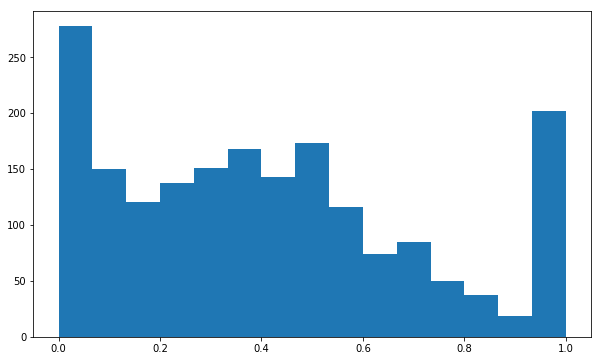

In [23]:
plt.hist(df3[x],bins='auto');

Weight matrix:

In [24]:
views = np.array(df3[x])

w = np.zeros((len(df3),len(df3)))

for i in range(0,len(df3)):
    for j in range(i,len(df3)):
        if (i == j):
            w[i,j] = 0
            continue
        else:
            w[i,j] = w[j,i] = 1 - abs(views[i]-views[j])

The mean value is: 0.6605019992973329
The max value is: 1.0
The min value is: 0.0


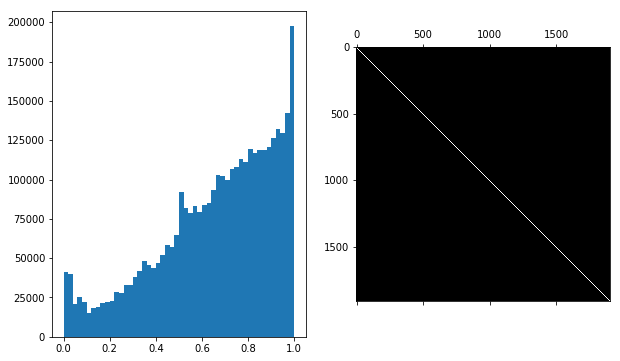

In [25]:
fig, axes = plt.subplots(1, 2)
axes[0].hist(w.reshape(-1), bins=50);
axes[1].spy(w);
print('The mean value is: {}'.format(w.mean()))
print('The max value is: {}'.format(w.max()))
print('The min value is: {}'.format(w.min()))

In [26]:
W = pd.DataFrame(w)

In [27]:
W.to_csv('Saved_Datasets/NormalizedTrailerW.csv', encoding='utf-8', index=False)

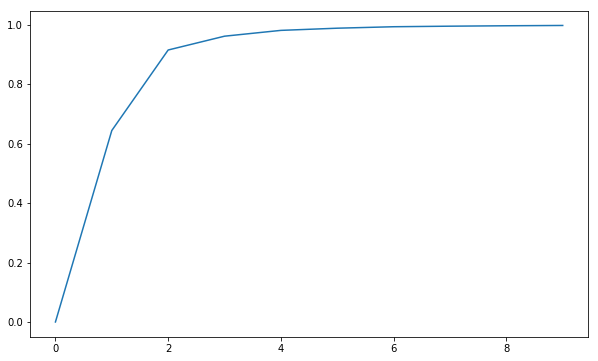

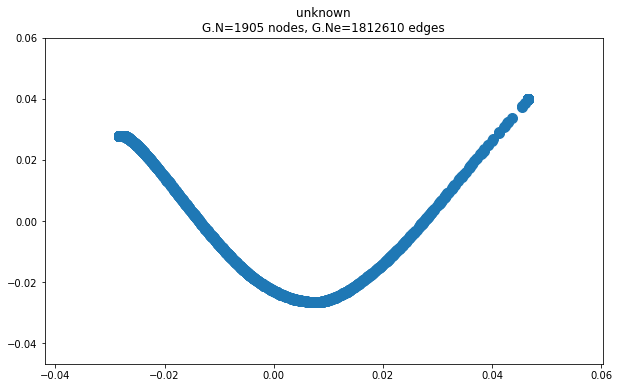

In [11]:
G = graphs.Graph(W)
G.compute_laplacian('normalized')
G.compute_fourier_basis(recompute=True)
plt.plot(G.e[0:10]);

G.set_coordinates(G.U[:, 1:3])
G.plot()

In [12]:
df_nf = pd.read_csv('Saved_Datasets/NewFeaturesDataset.csv')
df_features = pd.merge(df_nf,df3,on=['imdb_id','title'],how='right')

In [13]:
labels = preprocessing.LabelEncoder().fit_transform(df_features['success'])
G.set_coordinates(G.U[:,1:3])

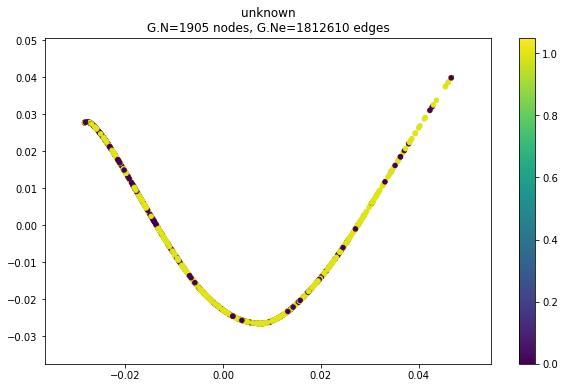

In [14]:
G.plot_signal(labels, vertex_size=20)

In [15]:
NEIGHBORS = 200

#sort the order of the weights
sort_order = np.argsort(w, axis = 1)

#declaration of a sorted weight matrix
sorted_weights = np.zeros((len(w), len(w)))

for i in range (0, len(w)):  
    for j in range(0, len(w)):
        if (j >= len(w) - NEIGHBORS):
            #copy the k strongest edges for each node
            sorted_weights[i, sort_order[i,j]] = w[i,sort_order[i,j]]
        else:
            #set the other edges to zero
            sorted_weights[i, sort_order[i,j]] = 0

#ensure the matrix is symmetric
bigger = sorted_weights.transpose() > sorted_weights
sorted_weights = sorted_weights - sorted_weights*bigger + sorted_weights.transpose()*bigger

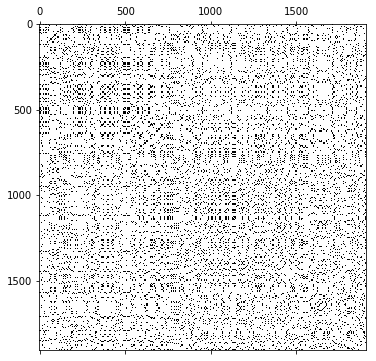

In [16]:
plt.spy(sorted_weights);

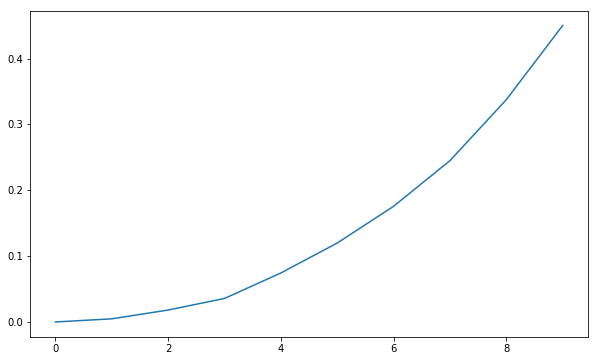

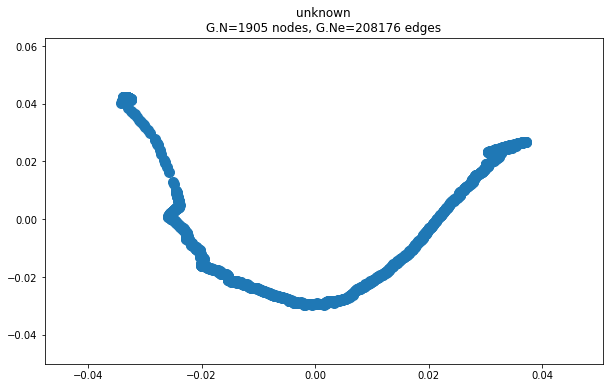

In [17]:
G = graphs.Graph(sorted_weights)
G.compute_laplacian('normalized')
G.compute_fourier_basis(recompute=True)
plt.plot(G.e[0:10]);

G.set_coordinates(G.U[:, 1:3])
G.plot()

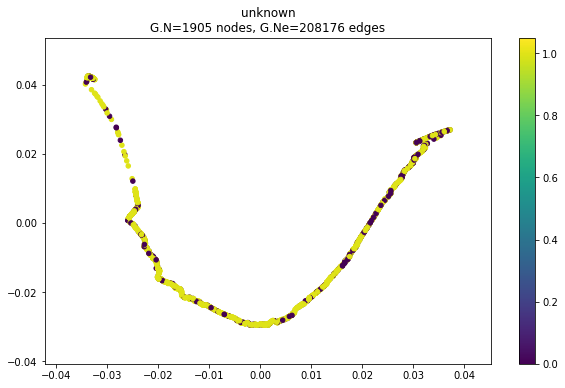

In [18]:
G.plot_signal(labels, vertex_size=20)